<a href="https://colab.research.google.com/github/KushalranaAI/Machine-learning-/blob/main/module_4_data_collection_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Where to collect data for machine learning?

Question need to be answer or understnad:
1. Importance of Data in Machine Learning?
- Ans: Data is crucial in machine learning as it is the input used to train algorithms and make predictions. The quality and quantity of data can greatly affect the accuracy and performance of a model. Good data should be representative, diverse, and labeled, and should avoid bias to ensure the model can generalize to new examples. The more data a model is trained on, the better it will be able to learn patterns and make predictions, but too much data can also lead to overfitting. Therefore, finding the right balance of data quality and quantity is important in machine learning.
2. Where to collect the data?
- kaggle
- UCI machine learning repository
- Google dataset search

3. Demonstration of data collection.

Importing dataset using kaggle API


In [16]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
! mkdir ~/.kaggle1

In [25]:
! cp kaggle.json ~/.kaggle1/
import json
token = {"username":"kushalrana","key":"c16b1a373464c70b5382e43e1c729e77"}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [26]:
! chmod 600 ~/.kaggle1/kaggle.json

In [28]:
!kaggle competitions download -c LANL-Earthquake-Prediction

100% 2.27G/2.27G [00:19<00:00, 133MB/s]
100% 2.27G/2.27G [00:19<00:00, 128MB/s]


In [29]:
# extract a compressed file
from zipfile import ZipFile
dataset = '/content/LANL-Earthquake-Prediction.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is Extracted')

The dataset is Extracted


In [ ]:
import pandas as pd
dataset1=pd.read_csv('/content/train.csv')
dataset1.head()

### Handling the missing value

Handling missing values in a dataset is a common challenge in data pre-processing and there are several methods to deal with it. Some of the most common methods include:

1. Deletion: This involves removing the entire row or column with missing values. This method is appropriate when the missing values are only a small portion of the dataset, and if the missing values are not randomly distributed.

2. Imputation: This involves replacing missing values with substitute values. There are several imputation methods, such as:

- Mean/Median/Mode Imputation: This method replaces missing values with the mean, median, or mode of the non-missing values in the same column.
- Regression Imputation: This method uses regression analysis to predict missing values based on the values of other variables in the dataset.
- Multiple Imputation: This method uses statistical models to create several imputed datasets, each with different missing values filled in, and then combines the results to provide a final estimate.
3. Interpolation: This involves estimating missing values based on the values of other observations in the dataset.

4. Extrapolation: This involves estimating missing values based on values outside the range of the observed data.

5. Data Wrangling: This involves using other available sources of data or knowledge to infer missing values.

The appropriate method depends on the amount of missing data, the reason for the missing values, and the structure of the dataset. It's important to choose a method that preserves the underlying relationships in the data and doesn't introduce any significant biases.





In [1]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the dataset 
dataset = pd.read_csv('/content/Placement_Dataset.csv')

In [4]:
# to see the first five rows of dataset
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
dataset.shape

(215, 15)

In [6]:
# checking the missing values in a dataset
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

### Central Tendencies
Central tendencies refer to a summary measure that gives us an idea of where the majority of the data in a dataset lies. There are three common measures of central tendency: mean, median, and mode.

- Mean: The mean is the average of a set of numbers and is calculated by summing all the values and dividing by the total number of values. The mean is sensitive to outliers and extreme values, so it may not always give a representative picture of the data.

- Median: The median is the middle value of a set of numbers when the data is ordered from smallest to largest. If there are an odd number of observations, the median is the middle value. If there are an even number of observations, the median is the average of the two middle values. The median is a robust statistic, meaning that it is not affected by outliers or extreme values.

- Mode: The mode is the most frequently occurring value in a dataset. A dataset can have one mode, multiple modes, or no mode at all. The mode is a useful measure of central tendency for nominal or ordinal data, but it is not useful for continuous or interval data.

It's important to choose the appropriate measure of central tendency depending on the type of data and the goals of the analysis. For example, if the data has a skewed distribution, the median may be a more appropriate measure of central tendency than the mean.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


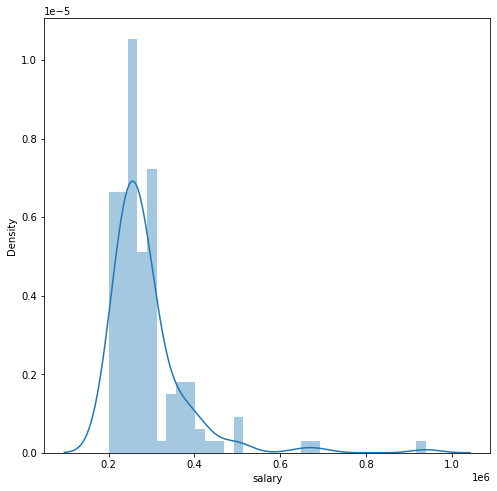

In [8]:
# analyze a distribution of data in a salary column
fig, ax = plt.subplots(figsize =(8,8))
sns.distplot(dataset.salary)


In [9]:
# using imputation to handle a missing value
# Replace the missing value with MEdium value

dataset['salary'].fillna(dataset['salary'].median(), inplace =True)

In [10]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [11]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [12]:
## droping method
salary_dataset = pd.read_csv('/content/Placement_Dataset.csv')

In [13]:
## drop the missng value
salary_dataset = salary_dataset.dropna(how = 'any')

In [14]:
salary_dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [15]:
salary_dataset.shape

(148, 15)

# Data standardization
Data standardization is a process of transforming the values in a dataset to have a common scale. This is useful when comparing values that have different units or scales, or when working with algorithms that are sensitive to the scale of the input data.

There are two common methods of standardizing data:

- Min-Max Scaling: This method transforms the data to a scale between 0 and 1 by subtracting the minimum value from each data point and dividing by the range (maximum value minus minimum value).

- Standardization: This method transforms the data to have a mean of 0 and a standard deviation of 1. The standardization is done by subtracting the mean from each data point and dividing by the standard deviation.

Standardizing data can improve the performance of some machine learning algorithms and is often a required pre-processing step for many data analysis tasks. However, it's important to note that standardization can have an impact on the interpretation of the data and its relationship to other variables, so it's important to choose the appropriate method and carefully consider the implications of the transformation.

In [16]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
# loading the datasets
dataset = sklearn.datasets.load_breast_cancer()

In [18]:
print(dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [21]:
# loading the data to a pandas dataframe
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [22]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
df.shape

(569, 30)

In [27]:
X = df
Y = dataset.target

In [28]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

Splitting the data into training data and test data


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

In [30]:
print(X.shape,X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


Standardize the data

In [31]:
print(dataset.data.std())

228.29740508276657


In [32]:
scaler = StandardScaler()

In [33]:
scaler.fit(X_train)

StandardScaler()

In [34]:
X_train_standardized = scaler.transform(X_train)

In [35]:
print(X_train_standardized)

[[ 1.40381088  1.79283426  1.37960065 ...  1.044121    0.52295995
   0.64990763]
 [ 1.16565505 -0.14461158  1.07121375 ...  0.5940779   0.44153782
  -0.85281516]
 [-0.0307278  -0.77271123 -0.09822185 ... -0.64047556 -0.31161687
  -0.69292805]
 ...
 [ 1.06478904  0.20084323  0.89267396 ...  0.01694621  3.06583565
  -1.29952679]
 [ 1.51308238  2.3170559   1.67987211 ...  1.14728703 -0.16599653
   0.82816016]
 [-0.73678981 -1.02636686 -0.74380549 ... -0.31826862 -0.40713129
  -0.38233653]]


In [36]:
X_test_standardized = scaler.transform(X_test)

In [38]:
print(X_train_standardized.std())

1.0


In [40]:
print(X_test_standardized.std())

0.8654541077212674


# Label Encoding
Label Encoding is a method of transforming categorical variables into numerical values. This is done by assigning a unique numerical value to each category in a categorical variable. The transformed variables can then be used as input to machine learning algorithms, which typically require numerical input data.

For example, suppose we have a categorical variable "color" with three categories: red, green, and blue. Label encoding would transform these categories into numerical values, such as red=1, green=2, blue=3.

Label encoding is a simple method, but it has some drawbacks. For example, it can introduce an arbitrary ordering of the categories that may not reflect any underlying relationship. Additionally, algorithms such as linear regression can assign different weights to the encoded categories, which can lead to biased results.

To overcome these limitations, another encoding method called One-Hot Encoding is often used, which creates a separate binary column for each category and assigns a value of 1 or 0 to indicate the presence or absence of that category in a particular row. This method does not introduce any arbitrary ordering of the categories and is often used with algorithms that can handle sparse data, such as decision trees and neural networks.

In [41]:
 # importing the dependencies
 import pandas as pd
 from sklearn.preprocessing import LabelEncoder

Label encoding of bread cancer dataset

In [42]:
# loading a data from csv file to pandas dataframe
cancer_data = pd.read_csv('/content/breast_cancer_data.csv')

In [43]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [45]:
cancer_data.shape

(569, 33)

In [48]:
# finding the count of different labels
cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [49]:
# load the label encoder function
label_encode = LabelEncoder()

In [50]:
labels = label_encode.fit_transform(cancer_data.diagnosis)

In [51]:
## apending the label to the dataframe
cancer_data['target']= labels

In [52]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,target
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [54]:
cancer_data['target'].value_counts()

0    357
1    212
Name: target, dtype: int64

Endcoing the iris data set

In [55]:
iris_data = pd.read_csv('/content/iris_data.csv')

In [56]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [59]:
# loadint the label encoder
label_encoder_1= LabelEncoder()

In [62]:
iris_labels = label_encoder_1.fit_transform(iris_data.Species )

In [63]:
iris_data['target']= iris_labels

In [64]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [65]:
iris_data['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

# Train Test split in Machine learning

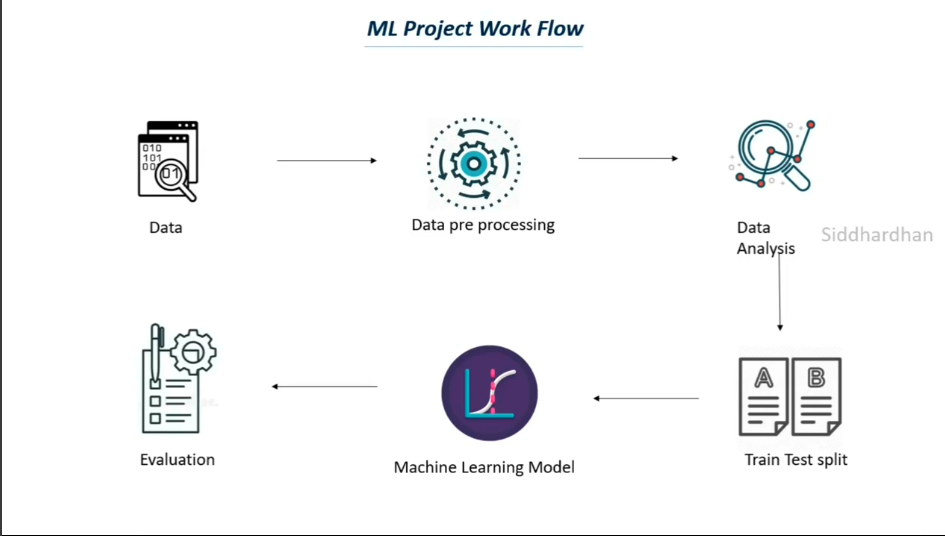